In [18]:
dat = read.csv("../datasets/Eulaema.csv")
head(dat)

  Eulaema_nigrita                                                             SA  SU   method   effort altitude MAT  MAP Tseason Pseason    forest.
1             492                                                Morro_do_Itaoca 1-1 NetTraps 4.189655        6 235 1073    2036      53 0.04416404
2             372                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-1    Traps 5.204007       17 230  987    1760      49 0.18217054
3             679                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba 2-2    Traps 5.204007       17 230  987    1760      49 0.18217054
4             600                                                  Mata_do_Funil 2-3    Traps 5.204007       30 231 1030    1820      51 0.01577287
5              28 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-1      Net 4.969813        0 259 1693    1074      62 0.05000000
6             535 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape 6-2      Net 4.969813       43 

In [19]:
summary(dat)

 Eulaema_nigrita        SA                 SU               method              effort          altitude           MAT             MAP      
 Min.   :   0.00   Length:178         Length:178         Length:178         Min.   : 1.609   Min.   :  -3.0   Min.   :135.0   Min.   : 623  
 1st Qu.:  13.00   Class :character   Class :character   Class :character   1st Qu.: 2.996   1st Qu.:  68.0   1st Qu.:207.0   1st Qu.:1176  
 Median :  38.00   Mode  :character   Mode  :character   Mode  :character   Median : 4.159   Median : 179.0   Median :228.0   Median :1348  
 Mean   :  81.14                                                            Mean   : 4.157   Mean   : 369.3   Mean   :221.2   Mean   :1457  
 3rd Qu.:  85.50                                                            3rd Qu.: 4.718   3rd Qu.: 625.0   3rd Qu.:240.0   3rd Qu.:1634  
 Max.   :1054.00                                                            Max.   :10.020   Max.   :1651.0   Max.   :263.0   Max.   :3073  
    Tseason  

In [20]:
mean_count <- mean(dat$Eulaema_nigrita)
sd_count <- sd(dat$Eulaema_nigrita)
threshold <- mean_count + 3*sd_count

dat$outlier_count <- dat$Eulaema_nigrita > threshold
dat[dat$outlier_count,]

    Eulaema_nigrita                                                             SA   SU   method   effort altitude MAT  MAP Tseason Pseason
1               492                                                Morro_do_Itaoca  1-1 NetTraps 4.189655        6 235 1073    2036      53
3               679                       Esta\xe7\xe3o_Ecol\xf3gica_de_Guaxindiba  2-2    Traps 5.204007       17 230  987    1760      49
4               600                                                  Mata_do_Funil  2-3    Traps 5.204007       30 231 1030    1820      51
6               535 \xc1rea_de_Prote\xe7\xe3o_Ambiental_da_Barra_do_Rio_Mamanguape  6-2      Net 4.969813       43 255 1697    1061      63
142            1054                       Permanent_Preservation_Area_Vargem_Limpa 60-1    Traps 9.706012      576 207 1229    2389      62
166             529                                  Reserva_Biol\xf3gica_Guaribas 72-1    Traps 4.158883       95 254 1265    1200      61
       forest.    lu

In [21]:
dat$MAT_C <- dat$MAT / 10
dat$Tseason_C <- dat$Tseason / 100

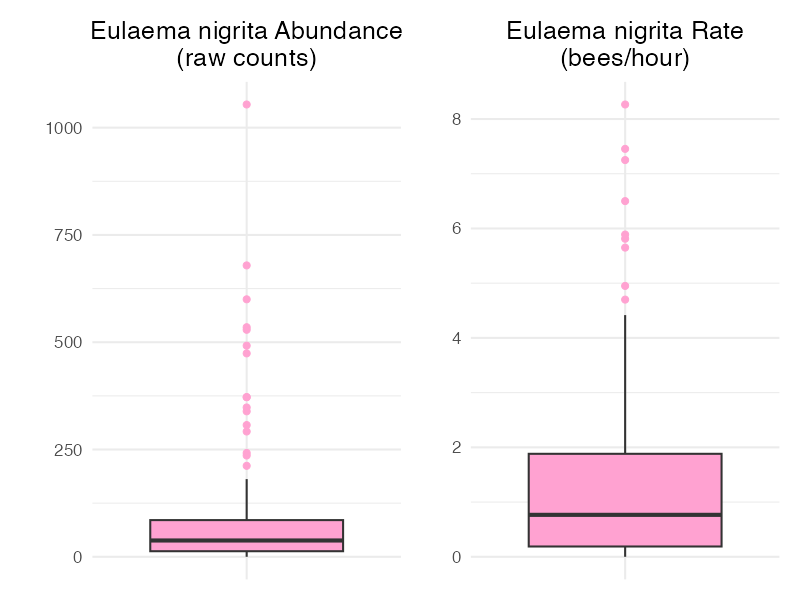

In [ ]:
library(ggplot2)
library(patchwork)

# Create bees/hour column
dat$rate <- dat$Eulaema_nigrita / exp(dat$effort)

# Raw counts plot
p1 <- ggplot(dat, aes(x = "", y = Eulaema_nigrita)) +
  geom_boxplot(fill = "#ffa2d1ff", outlier.color = "#ffa2d1ff") +  
  labs(title = "Eulaema nigrita Abundance\n(raw counts)", y = "") +
  theme_minimal(base_size = 16) +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(10,10,10,10))

# Bees/hour plot
p2 <- ggplot(dat, aes(x = "", y = rate)) +
  geom_boxplot(fill = "#ffa2d1ff", outlier.color = "#ffa2d1ff") +
  labs(title = "Eulaema nigrita Rate\n(bees/hour)", y = "") +
  theme_minimal(base_size = 16) +
  theme(axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.title = element_text(hjust = 0.5),
        plot.margin = margin(10,10,10,10))

panel <- p1 | p2
panel


In [23]:
library(dplyr)

dat$method <- factor(dat$method)

num_vars <- c("effort", "altitude", "MAT_C", "MAP", "Tseason_C", "Pseason", "forest.", "lu_het")
dat_scaled <- dat
dat_scaled[num_vars] <- scale(dat[num_vars])


In [24]:
library(MASS)
m_nb_1_scaled_effort = glm.nb(Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + Pseason + forest. + method + offset(effort), 
              data = dat_scaled)
summary(m_nb_1_scaled_effort)


Call:
glm.nb(formula = Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + 
    Pseason + forest. + method + offset(effort), data = dat_scaled, 
    init.theta = 1.066730263, link = log)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.22135    0.10570  39.936  < 2e-16 ***
altitude       -0.57790    0.24707  -2.339   0.0193 *  
MAT_C          -0.69997    0.27945  -2.505   0.0123 *  
MAP            -0.64296    0.09508  -6.763 1.36e-11 ***
Tseason_C      -0.79477    0.12957  -6.134 8.57e-10 ***
Pseason         0.38154    0.09243   4.128 3.66e-05 ***
forest.        -0.34322    0.08616  -3.984 6.79e-05 ***
methodNetTraps -0.39355    0.24902  -1.580   0.1140    
methodTraps    -0.85075    0.19366  -4.393 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(1.0667) family taken to be 1)

    Null deviance: 335.26  on 177  degrees of freedom
Residual deviance: 204.05  on 169  de

In [25]:
dispersion <- m_nb_1_scaled_effort$deviance / m_nb_1_scaled_effort$df.residual
dispersion

[1] 1.207406

In [26]:
1-(m_nb_1_scaled_effort$deviance/m_nb_1_scaled_effort$null.deviance)

[1] 0.3913697

In [ ]:
library(broom)  

tidy_nb <- broom::tidy(m_nb_1_scaled_effort, conf.int = TRUE, exponentiate = TRUE)

tidy_nb <- tidy_nb %>%
  dplyr::mutate(
    percent_change = (estimate - 1) * 100
  ) %>%
  dplyr::select(term, estimate, percent_change)

tidy_nb <- tidy_nb %>%
  dplyr::mutate(
    type = ifelse(grepl("method", term), "Factor", "Numeric")
  )

tidy_nb

# A tibble: 9 × 4
  term           estimate percent_change type   
  <chr>             <dbl>          <dbl> <chr>  
1 (Intercept)      68.1           6713.  Numeric
2 altitude          0.561          -43.9 Numeric
3 MAT_C             0.497          -50.3 Numeric
4 MAP               0.526          -47.4 Numeric
5 Tseason_C         0.452          -54.8 Numeric
6 Pseason           1.46            46.5 Numeric
7 forest.           0.709          -29.1 Numeric
8 methodNetTraps    0.675          -32.5 Factor 
9 methodTraps       0.427          -57.3 Factor 

In [28]:
m_nb_1 = glm.nb(Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + Pseason + forest. + method + offset(effort), 
              data = dat)
summary(m_nb_1)


Call:
glm.nb(formula = Eulaema_nigrita ~ altitude + MAT_C + MAP + Tseason_C + 
    Pseason + forest. + method + offset(effort), data = dat, 
    init.theta = 0.9272454942, link = log)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    10.7646224  3.6780065   2.927  0.00343 ** 
altitude       -0.0012698  0.0007427  -1.710  0.08731 .  
MAT_C          -0.2418632  0.1326787  -1.823  0.06831 .  
MAP            -0.0016008  0.0002491  -6.426 1.31e-10 ***
Tseason_C      -0.1472439  0.0258083  -5.705 1.16e-08 ***
Pseason         0.0150574  0.0046691   3.225  0.00126 ** 
forest.        -1.3550393  0.3257585  -4.160 3.19e-05 ***
methodNetTraps -0.4997260  0.2673604  -1.869  0.06161 .  
methodTraps    -1.1690416  0.2077160  -5.628 1.82e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(0.9272) family taken to be 1)

    Null deviance: 338.20  on 177  degrees of freedom
Residual deviance: 205.

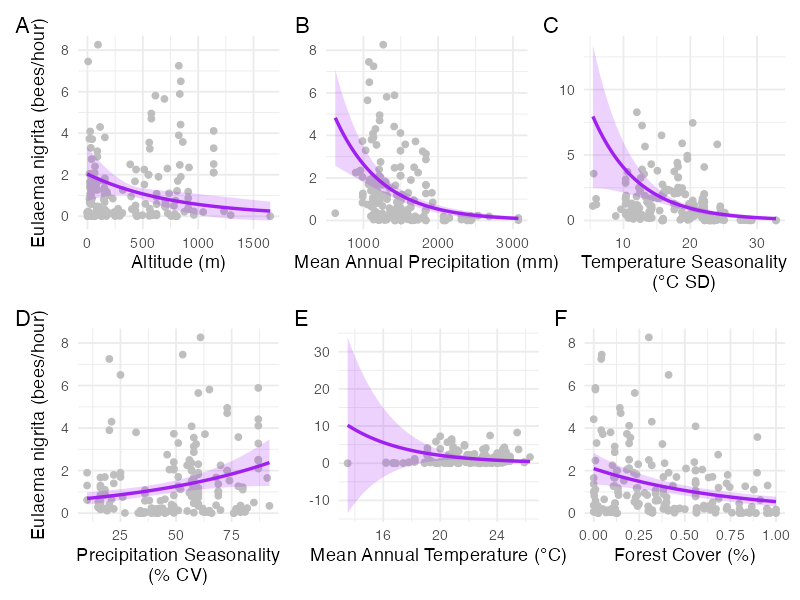

In [ ]:
library(ggplot2)
library(patchwork)

key_vars <- c("altitude", "MAP", "Tseason_C", "Pseason", "MAT_C", "forest.")

nice_labels <- c("Altitude (m)",
                 "Mean Annual Precipitation (mm)",
                 "Temperature Seasonality\n(°C SD)",
                 "Precipitation Seasonality\n(% CV)",
                 "Mean Annual Temperature (°C)",
                 "Forest Cover (%)")

plots <- list()

mean_effort_hours <- exp(mean(dat$effort, na.rm = TRUE))

for(i in seq_along(key_vars)) {
  var <- key_vars[i]
  
  new_data <- data.frame(
    effort = mean(dat$effort, na.rm=TRUE),  
    altitude = mean(dat$altitude, na.rm=TRUE),
    MAT_C = mean(dat$MAT_C, na.rm=TRUE),
    MAP = mean(dat$MAP, na.rm=TRUE),
    Tseason_C = mean(dat$Tseason_C, na.rm=TRUE),
    Pseason = mean(dat$Pseason, na.rm=TRUE),
    forest. = mean(dat$forest., na.rm=TRUE),
    method = factor("Net", levels=levels(dat$method))
  )
  
  new_data <- new_data[rep(1, 100), ]
  new_data[[var]] <- seq(min(dat[[var]], na.rm=TRUE),
                         max(dat[[var]], na.rm=TRUE), length.out=100)
  
  pred <- predict(m_nb_1, newdata = new_data, type="response", se.fit = TRUE)
  
  new_data$fit_rate <- pred$fit / mean_effort_hours
  new_data$upper_rate <- (pred$fit + 1.96 * pred$se.fit) / mean_effort_hours
  new_data$lower_rate <- (pred$fit - 1.96 * pred$se.fit) / mean_effort_hours
  
  dat$rate <- dat$Eulaema_nigrita / exp(dat$effort)
  
  p <- ggplot(new_data, aes(x = .data[[var]], y = fit_rate)) +
    geom_point(data = dat, aes(x = .data[[var]], y = rate), color = "grey") +
    geom_line(color = "purple", linewidth = 1.2) +
    geom_ribbon(aes(ymin = lower_rate, ymax = upper_rate), alpha = 0.2, fill = "purple") +
    labs(x = nice_labels[i], y = "Eulaema nigrita (bees/hour)") +
    theme_minimal(base_size = 14) +
    theme(
      plot.margin = unit(c(0.2,0.2,0.2,0.2), "cm"),
      axis.title.y = if(i == 1 || i == 4) element_text(margin=margin(r=10)) else element_blank()
    )
  
  plots[[i]] <- p
}

panel <- (plots[[1]] | plots[[2]] | plots[[3]]) /
         (plots[[4]] | plots[[5]] | plots[[6]]) &
         plot_annotation(tag_levels = 'A')

panel
